# Automatically Generated Report

In [2]:
#! pip install python-docx

  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184600 sha256=37e28a14628efe7e1b5ca26b3df210ed2868e37c3c2d19aa1057965969618cc0
  Stored in directory: c:\users\luisr\appdata\local\pip\cache\wheels\32\b8\b2\c4c2b95765e615fe139b0b17b5ea7c0e1b6519b0a9ec8fb34d
Successfully built python-docx


In [20]:
! pip install docx2pdf

ERROR: Could not install packages due to an EnvironmentError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'C:\\Users\\luisr\\anaconda3\\Lib\\site-packages\\docx2pdf\\__init__.py'



In [1]:
from docx2pdf import convert

from IPython.display import clear_output

import pandas as pd, numpy as np, matplotlib.pyplot as plt

import docx, os

from docx.enum.text import WD_ALIGN_PARAGRAPH

In [2]:
def get_pics_folders(path='.'):

    folders = []
    pics = []    
    for folder in os.listdir(path):

        try:
            os.listdir(path+'/'+folder)
            folders.append(folder)

        except:
            if folder[-4:]=='.png'or folder[-4:]=='.PNG': pics.append(folder)
          
    return pics, folders

In [3]:
def add_imgs(path, files):

    for file in files: 
        if file[-4:]=='.png' or file[-4:]=='.PNG': doc.add_picture(file, )
        mydoc.add_picture(path+'/'+file, width=docx.shared.Inches(5), height=docx.shared.Inches(4))


In [4]:
def pics_paths(path='.', pics_dict={}, report=False):
    
    pics, folders = get_pics_folders(path)
    
    if pics!=[]: pics_dict[path] = pics
    
    for folder in folders:

        if report:
            print('path:', path+'/'+folder)
            print('dict:', pics_dict)
            #print('')
            if input()=='exit': break

        pics_dict = pics_paths(path=path+'/'+folder, pics_dict=pics_dict)
    
    
    return pics_dict

In [5]:
paths = pics_paths('.')

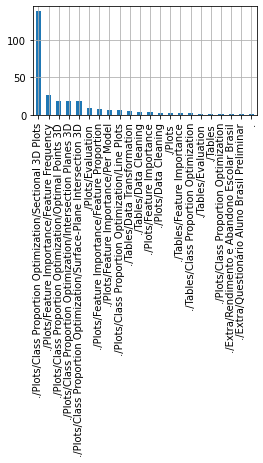

In [6]:
pics_cnt = pd.Series({key:len(paths[key]) for key in paths.keys()}).sort_values(ascending=False)
fig = plt.figure(figsize=(4,2))

pics_cnt.plot.bar()
plt.grid()

In [7]:
for key in list(paths.keys()):
    
    if len(paths[key])>10: del paths[key]

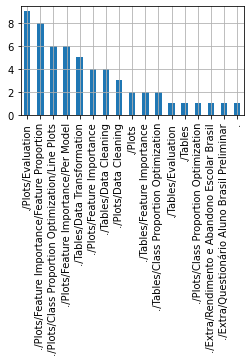

In [8]:
pics_cnt = pd.Series({key:len(paths[key]) for key in paths.keys()}).sort_values(ascending=False)
fig = plt.figure(figsize=(4,2))

pics_cnt.plot.bar()
plt.grid()

In [9]:
list(paths.keys())

['.',
 './Extra/Questionário Aluno Brasil Preliminar',
 './Extra/Rendimento e Abandono Escolar Brasil',
 './Plots',
 './Plots/Class Proportion Optimization',
 './Plots/Class Proportion Optimization/Line Plots',
 './Plots/Data Cleaning',
 './Plots/Evaluation',
 './Plots/Feature Importance',
 './Plots/Feature Importance/Feature Proportion',
 './Plots/Feature Importance/Per Model',
 './Tables',
 './Tables/Class Proportion Optimization',
 './Tables/Data Cleaning',
 './Tables/Data Transformation',
 './Tables/Evaluation',
 './Tables/Feature Importance']

### Testing 

In [42]:
from IPython.display import Image

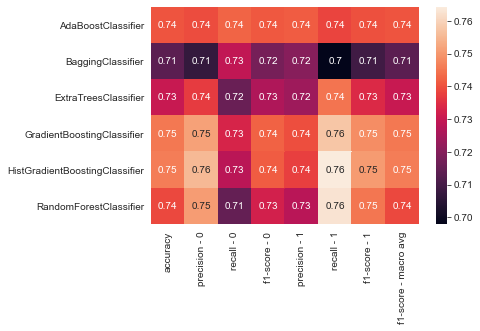

In [44]:
Image(path+'/'+pic)

In [64]:
doc = docx.Document()

path = list(paths.keys())[3:][0]
pic = paths[path][0]

#doc.add_picture(path+'/'+pic, width=100, height=200)

doc.add_picture(path+'/'+pic)
#doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER

test_path='DOC_PIC_TEST.docx'
doc.save(test_path); convert(test_path)

  0%|          | 0/1 [00:00<?, ?it/s]

# Extracting Image Metadata

### Method #1:

In [97]:
from PIL import Image as pil_img
from PIL.ExifTags import TAGS

In [126]:
def img_metadata(path):

    img = pil_img.open(path)
    metadata = img.getexif()
    
    return metadata 

    meta_dct = {}
    for tag_id in metadata:

        # get the tag name, instead of human unreadable tag id
        tag = TAGS.get(tag_id, tag_id)
        data = metadata.get(tag_id)

        # decode bytes 
        if isinstance(data, bytes):
            data = data.decode()

            # store data as a dictionary            
        meta_dct[tag] = data
            
    return meta_dct

### Method #2:

In [130]:
! pip install piexif

In [131]:
import piexif

image_name = path+'/'+pic

exif_dict = piexif.load(image_name)

# Extract thumbnail and save it, if exists
thumbnail = exif_dict.pop('thumbnail')
if thumbnail is not None:
    with open('thumbnail.jpg', 'wb') as f:
        f.write(thumbnail)

# Iterate through all the other ifd names and print them
print(f'Metadata for {image_name}:')
for ifd in exif_dict:
    print(f'{ifd}:')
    for tag in exif_dict[ifd]:
        tag_name = piexif.TAGS[ifd][tag]["name"]
        tag_value = exif_dict[ifd][tag]
        # Avoid print a large value, just to be pretty
        if isinstance(tag_value, bytes):
            tag_value = tag_value[:10]
        print(f'\t{tag_name:25}: {tag_value}')
print()

# Writing .doc extension document

In [82]:
from docx.shared import Pt, Inches

### Setting folder order

In [180]:
print_paths = list(paths.keys())[3:]

cnt = 0
for item in print_paths:
    print(f'{cnt}: {item}')
    cnt+=1

0: ./Plots
1: ./Plots/Class Proportion Optimization
2: ./Plots/Class Proportion Optimization/Line Plots
3: ./Plots/Data Cleaning
4: ./Plots/Evaluation
5: ./Plots/Feature Importance
6: ./Plots/Feature Importance/Feature Proportion
7: ./Plots/Feature Importance/Per Model
8: ./Tables
9: ./Tables/Class Proportion Optimization
10: ./Tables/Data Cleaning
11: ./Tables/Data Transformation
12: ./Tables/Evaluation
13: ./Tables/Feature Importance


In [192]:
index = [3, 10, 11, 4, 12, 0, 1, 2, 8, 9, 5, 7, 6, 13]

In [194]:
path_lst = [print_paths[i] for i in index]; path_lst

['./Plots/Data Cleaning',
 './Tables/Data Cleaning',
 './Tables/Data Transformation',
 './Plots/Evaluation',
 './Tables/Evaluation',
 './Plots',
 './Plots/Class Proportion Optimization',
 './Plots/Class Proportion Optimization/Line Plots',
 './Tables',
 './Tables/Class Proportion Optimization',
 './Plots/Feature Importance',
 './Plots/Feature Importance/Per Model',
 './Plots/Feature Importance/Feature Proportion',
 './Tables/Feature Importance']

### Writing Document

In [195]:
doc = docx.Document()
sizes = []
for path in path_lst:

    heads = path.split('/')[2:]
    run = doc.add_paragraph().add_run(' '.join(heads))
    font = run.font; font.name='Arial'; font.size=Pt(12); font.bold=True
    
    for pic in paths[path]:
        
        img = pil_img.open(path+'/'+pic); w, h = img.size        
        if w/96 >= 5.2: width=Inches(5.5)
        else: width=Inches(w/96)
        
        doc.add_picture(path+'/'+pic, width=width)
        doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
        
        doc.add_paragraph().add_run((heads[-1]+' - ' if len(heads)!=0 else '') + pic[:-4] + '\n')
        doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
        paragraph.font.name='Arial'
        
doc.save('auto_report.docx'); convert('auto_report.docx')

  0%|          | 0/1 [00:00<?, ?it/s]

## References:

1. docx lybrary documentation: https://python-docx.readthedocs.io/en/latest/index.html
2. How to get image metadata: https://www.thepythoncode.com/article/extracting-image-metadata-in-python
3. https://medium.com/vacatronics/how-to-extract-metadata-from-images-using-python-cd8de8ab48c5
4. https://datatofish.com/png-to-jpg-python/
5. https://www.kite.com/python/answers/how-to-get-the-size-of-an-image-with-pil-in-python